In [1]:
!head -5 ../data/state_of_the_union/Joe_Biden\'s_First.txt

9:06 P.M. EDT

THE PRESIDENT:  Thank you.  (Applause.)  Thank you.  Thank you.  Good to be back.  And Mitch and Chuck will understand it’s good to be almost home, down the hall.  Anyway, thank you all.

Madam Speaker, Madam Vice President — (applause) — no President has ever said those words from this podium.  No President has ever said those words, and it’s about time.  (Applause.)


In [2]:
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [3]:
DATA = '../data/state_of_the_union'

In [4]:
docs = sorted([doc for doc in os.listdir(DATA) if doc.endswith('.txt')])
docs[:10]

["Abraham_Lincoln's_First.txt",
 "Abraham_Lincoln's_Fourth.txt",
 "Abraham_Lincoln's_Second.txt",
 "Abraham_Lincoln's_Third.txt",
 "Andrew_Jackson's_Eighth.txt",
 "Andrew_Jackson's_Fifth.txt",
 "Andrew_Jackson's_First.txt",
 "Andrew_Jackson's_Fourth.txt",
 "Andrew_Jackson's_Second.txt",
 "Andrew_Jackson's_Seventh.txt"]

In [5]:
n_docs = len(docs)
print(n_docs)

229


In [6]:
def clean(txt):
    apostrophes = re.compile(r"'’")
    numeric = re.compile(r'[0-9]+')
    non_alphanum = re.compile(r'\W+')
    whitespace = re.compile(r'\s+')
    txt = txt.lower()
    txt = re.sub(apostrophes, '', txt)
    txt = txt.replace("'", '').replace('’', '')
    txt = re.sub(numeric, ' ', txt)
    txt = re.sub(non_alphanum, ' ', txt)
    txt = re.sub(whitespace, ' ', txt)
    txt = txt.strip()
    return txt

In [7]:
def read_doc(path):
    with open(path, 'r') as f:
        doc = f.read()
    doc = clean(doc)
    return doc

In [8]:
a1 = read_doc(f'{DATA}/{docs[0]}')
a1[:100]

'fellow citizens of the senate and house of representatives in the midst of unprecedented political t'

In [9]:
corpus = [read_doc(f'{DATA}/{doc}') for doc in docs]

In [10]:
stop_words = [
    'a', 'about', 'again', 'all', 'also', 'am', 'an', 'and', 'any',
    'applause', 'are', 'as', 'at', 'back', 'be', 'because', 'been',
    'before', 'but', 'by', 'can', 'cannot', 'cant', 'did', 'do', 'does',
    'done', 'dont', 'down', 'during', 'every', 'for', 'from', 'get',
    'going', 'got', 'have', 'had', 'has', 'he', 'here', 'his', 'how',
    'i', 'if', 'ill', 'im', 'in', 'into', 'is', 'it', 'its', 'ive',
    'let', 'lets', 'make', 'made', 'many', 'may', 'me', 'more', 'most',
    'must', 'my', 'need', 'no', 'nor', 'not', 'now', 'of', 'on', 'only',
    'or', 'other', 'our', 'out', 'over', 'shall', 'she', 'should', 'so',
    'some', 'st', 'such', 'than', 'that', 'thats', 'the', 'their',
    'them', 'there', 'theres', 'these', 'they', 'this', 'those',
    'through', 'to', 'too', 'under', 'up', 'upon', 'us', 'was', 'we',
    'weve', 'were', 'what', 'which', 'when', 'where', 'while', 'who',
    'will', 'with', 'wont', 'would', 'you', 'your']
vectorizer = TfidfVectorizer(
    lowercase=True, stop_words=stop_words, ngram_range=(1, 2))
tf_idf = vectorizer.fit_transform(corpus)

In [11]:
tf_idf

<229x610838 sparse matrix of type '<class 'numpy.float64'>'
	with 1187190 stored elements in Compressed Sparse Row format>

In [12]:
def rename(speech):
    try:
        segments = speech.replace('.txt', '').split('_')
        if len(segments) < 3:
            segments += ['First']
        names = segments[:-2]
        surname, order = segments[-2:]
        init = ''.join([name[0] for name in names])
        surname = re.sub("'s?", '', surname)
        n = {
            'First': '1',
            'Second': '2',
            'Third': '3',
            'Fourth': '4',
            'Fifth': '5',
            'Sixth': '6',
            'Seventh': '7',
            'Eighth': '8',
            'Ninth': '9',
            'Tenth': '10',
            'Eleventh': '11',
            'Twelfth': '12'
        }[order]
        return ''.join([init, surname, n])
    except:
        print(speech)
        raise

In [13]:
df = pd.DataFrame(
    tf_idf.T.todense(),
    index=vectorizer.get_feature_names_out(),
    columns=[doc.replace('.txt', '') for doc in docs])
df.rename(columns={x: rename(x) for x in list(df)}, inplace=True)
df.head(5)

,ALincoln1,ALincoln4,ALincoln2,ALincoln3,AJackson8,AJackson5,AJackson1,AJackson4,AJackson2,AJackson7,...,WMcKinley3,WWilson8,WWilson5,WWilson1,WWilson4,WWilson2,WWilson7,WWilson6,WWilson3,ZTaylor1
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aa cases,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaa program,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def get_top_for_president(df, pres, top_n=20, words_only=True):
    pd.set_option('mode.chained_assignment', None)
    sub = df[[col for col in list(df) if pres in col]]
    sub['mean'] = sub.mean(axis=1)
    sub.sort_values('mean', ascending=False, inplace=True)
    pd.set_option('mode.chained_assignment','warn')
    top = sub.head(top_n)
    if words_only:
        return list(top.index)
    return top

In [15]:
recent = ['Carter', 'Reagan', 'GHWBush', 'Clinton', 'GWBush', 'Obama', 'Trump', 'Biden']
examine = [
    'Lincoln', 'TRoosevelt', 'FDRoosevelt', 'Eisenhower', 'Truman', 'Kennedy', 'LBJohnson', 'Nixon'] + recent
for pres in examine:
    print(pres)
    print(get_top_for_president(df, pres, 50))
    print()

Lincoln
['states', 'emancipation', 'congress', 'government', 'united', 'united states', 'people', 'year', 'war', 'great', 'country', 'general', 'last', 'union', 'national', 'navy', 'secretary', 'one', 'public', 'department', 'persons', 'new', 'naval', 'labor', 'subject', 'time', 'slavery', 'insurgents', 'insurgent', 'rebellion', 'condition', 'attention', 'proclamation', 'disbursements', 'service', 'citizens', 'report', 'foreign', 'colored', 'state', 'part', 'same', 'treasury', 'much', 'between', 'receipts', 'kentucky', 'insurrection', 'power', 'loyal']

TRoosevelt
['government', 'law', 'great', 'states', 'people', 'men', 'man', 'work', 'corporations', 'congress', 'public', 'interstate', 'business', 'country', 'one', 'united', 'united states', 'conditions', 'national', 'good', 'labor', 'service', 'forest', 'nation', 'navy', 'american', 'power', 'islands', 'time', 'against', 'far', 'industrial', 'present', 'commerce', 'possible', 'war', 'canal', 'well', 'interstate commerce', 'army', 'of

In [16]:
df.shape

(610838, 229)

In [17]:
KEEP = 100_000
df['total'] = df.sum(axis=1)
df = df.sort_values('total', ascending=False, ignore_index=True)
df.drop(columns=['total'], inplace=True)
reduced = df.loc[:KEEP, :]
reduced.head()

,ALincoln1,ALincoln4,ALincoln2,ALincoln3,AJackson8,AJackson5,AJackson1,AJackson4,AJackson2,AJackson7,...,WMcKinley3,WWilson8,WWilson5,WWilson1,WWilson4,WWilson2,WWilson7,WWilson6,WWilson3,ZTaylor1
0,0.069786,0.060098,0.020081,0.061240,0.108222,0.108002,0.132107,0.095318,0.117974,0.143784,...,0.149931,0.081949,0.021810,0.064055,0.005154,0.049912,0.051835,0.037457,0.053868,0.090466
1,0.074828,0.095740,0.107467,0.110335,0.107752,0.132541,0.100843,0.089632,0.132783,0.100212,...,0.162740,0.045330,0.014477,0.035875,0.005131,0.053245,0.019354,0.003108,0.020987,0.110662
2,0.077838,0.063103,0.045182,0.032078,0.055060,0.060280,0.044036,0.037068,0.049583,0.102703,...,0.084797,0.063738,0.029080,0.036031,0.051536,0.024956,0.055075,0.028093,0.028105,0.098220
3,0.024368,0.048499,0.053173,0.079425,0.055541,0.111479,0.051083,0.032050,0.055190,0.093240,...,0.141323,0.045925,0.011000,0.024231,0.005199,0.025174,0.009804,0.003149,0.014175,0.073005
4,0.024580,0.048922,0.048529,0.080119,0.054094,0.112453,0.051530,0.032330,0.055672,0.087784,...,0.141307,0.046326,0.007398,0.024442,0.005244,0.025394,0.009890,0.000000,0.011916,0.073643


In [18]:
tsne = TSNE(n_components=2).fit_transform(reduced.T)
pca = PCA(n_components=6).fit_transform(reduced.T)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [19]:
tsne.shape, pca.shape

((229, 2), (229, 6))

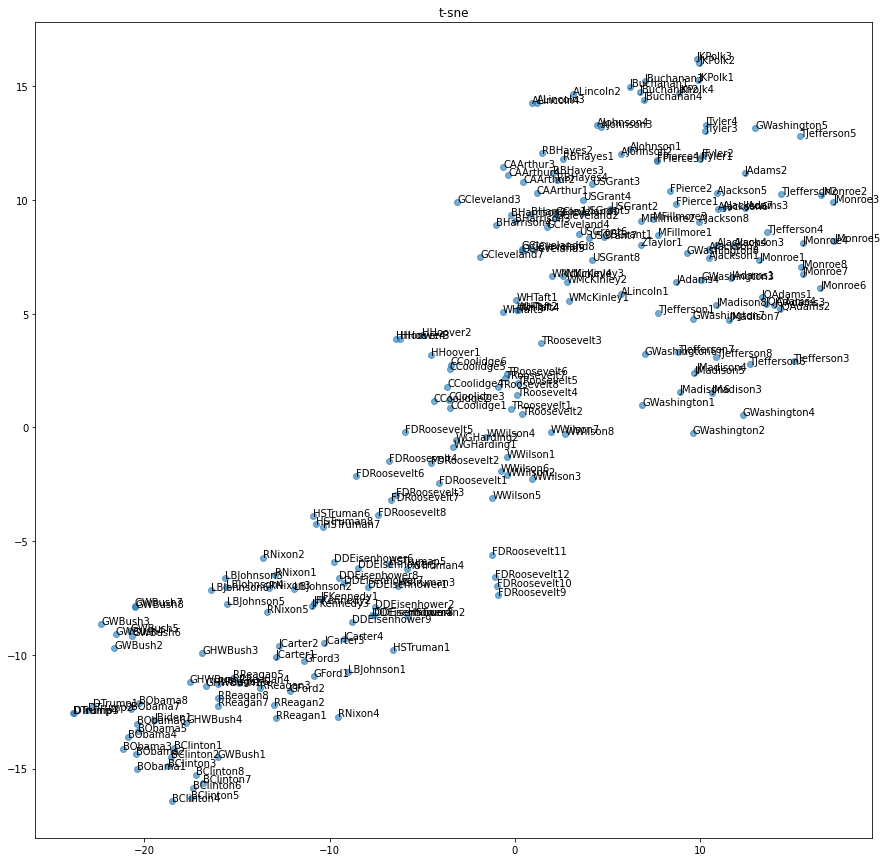

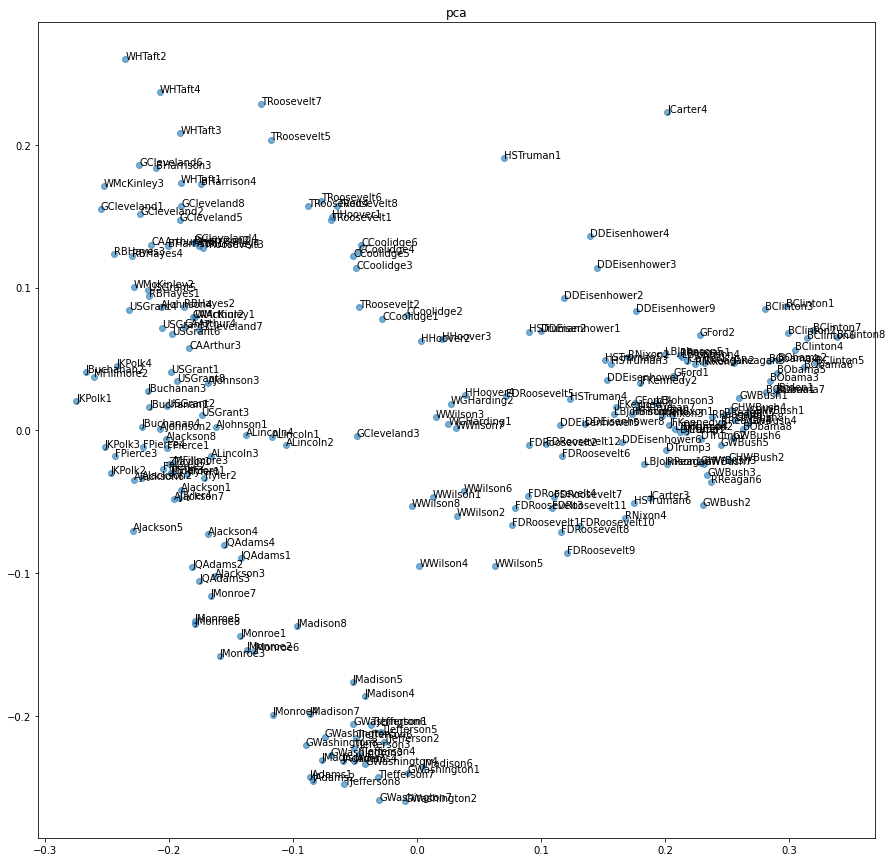

In [20]:
for proj, title in zip([tsne, pca], ['t-sne', 'pca']):
    plt.figure(figsize=[15, 15])
    plt.scatter(proj[:, 0], proj[:, 1], alpha=0.6)
    plt.title(title)
    for i, speech in enumerate(reduced.columns):
        plt.annotate(speech, (proj[i, 0], proj[i, 1]));

In [21]:
colors = {
    'JCarter': '#0000FF',
    'BClinton': '#0033FF',
    'BObama': '#0066FF',
    'JBiden': '#0099FF',

    'RReagan': '#FF0000',
    'GHWBush': '#FF3300',
    'GWBush': '#FF6600',
    'DTrump': '#FF0000'}

In [22]:
cols = [[col for col in list(reduced) if x in col] for x in examine]
cols = [speech for pres in cols for speech in pres]
#cols

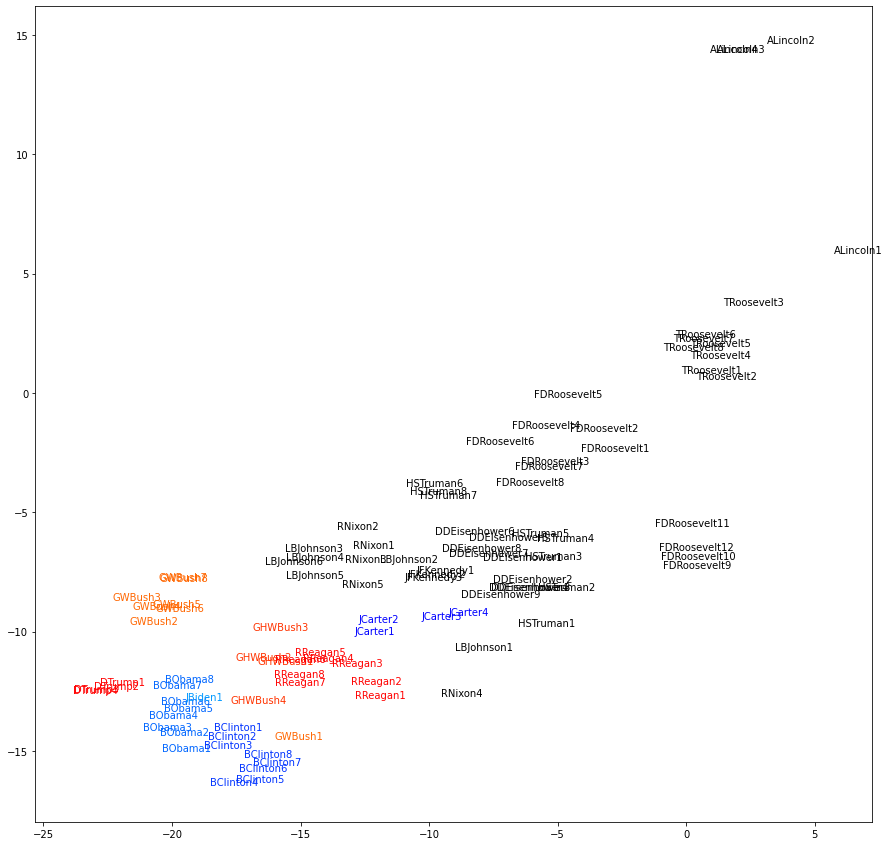

In [23]:
plt.figure(figsize=[15, 15])
for i, speech in enumerate(reduced.columns):
    if speech in cols:
        plt.scatter(tsne[i, 0], tsne[i, 1], alpha=0)
        pres = re.sub('[0-9]+', '', speech)
        col = colors.get(pres, '#000000')
        plt.annotate(speech, (tsne[i, 0], tsne[i, 1]), color=col);

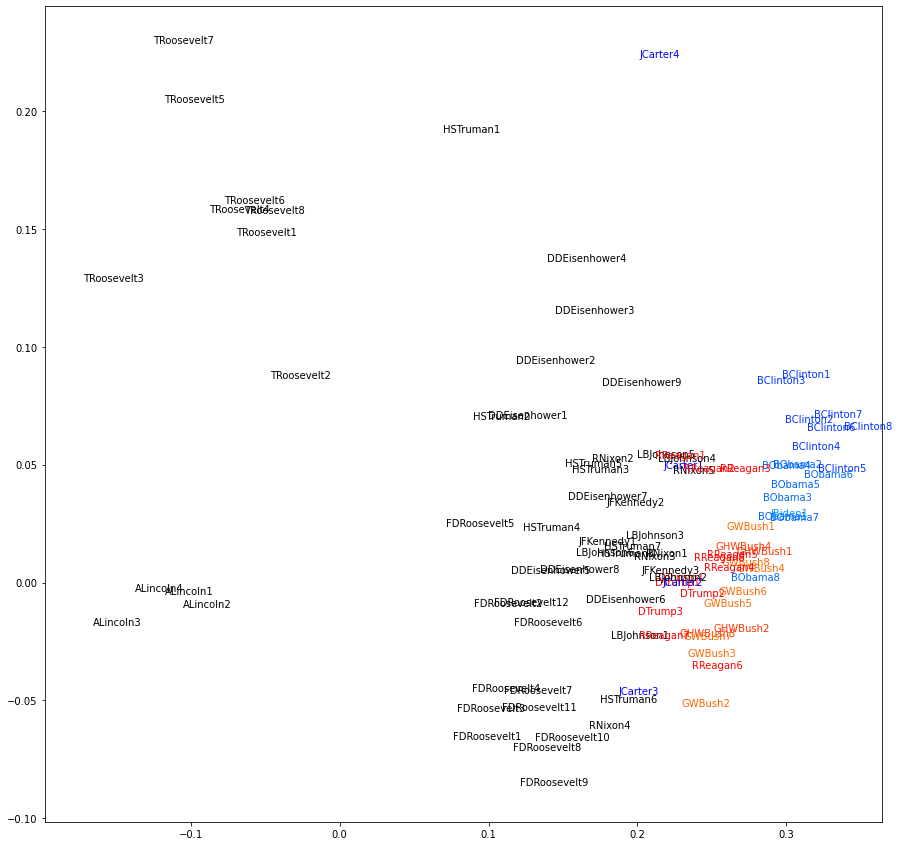

In [24]:
plt.figure(figsize=[15, 15])
for i, speech in enumerate(reduced.columns):
    if speech in cols:
        plt.scatter(pca[i, 0], pca[i, 1], alpha=0)
        pres = re.sub('[0-9]+', '', speech)
        col = colors.get(pres, '#000000')
        plt.annotate(speech, (pca[i, 0], pca[i, 1]), color=col);

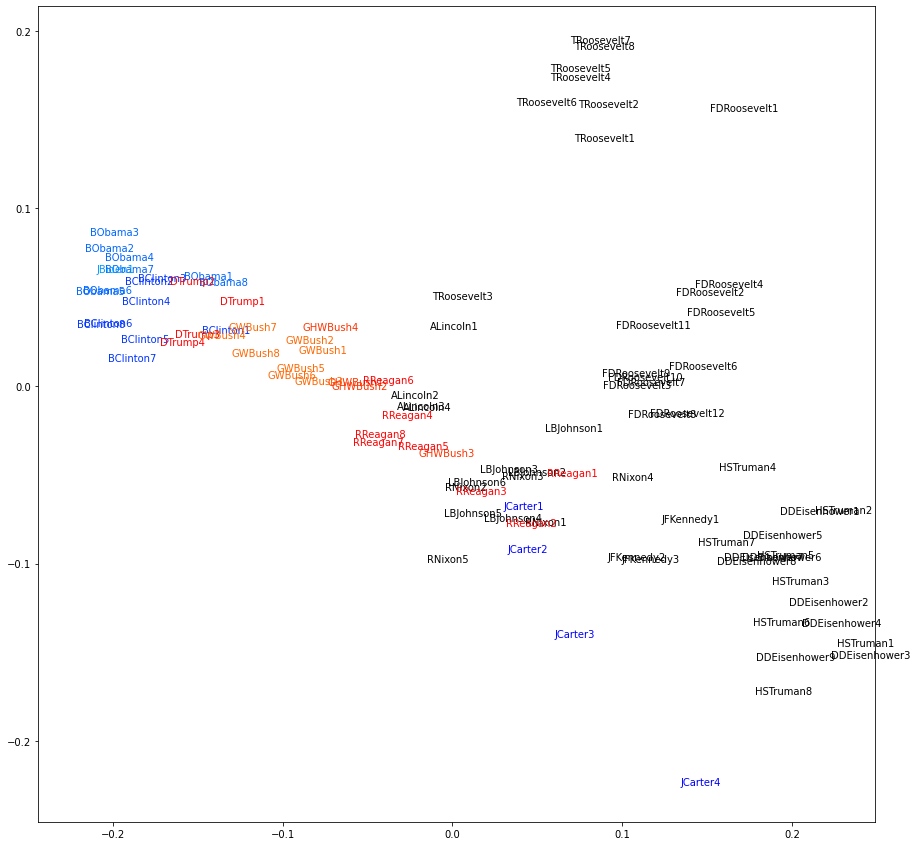

In [25]:
plt.figure(figsize=[15, 15])
for i, speech in enumerate(reduced.columns):
    if speech in cols:
        plt.scatter(pca[i, 2], pca[i, 3], alpha=0)
        pres = re.sub('[0-9]+', '', speech)
        col = colors.get(pres, '#000000')
        plt.annotate(speech, (pca[i, 2], pca[i, 3]), color=col);

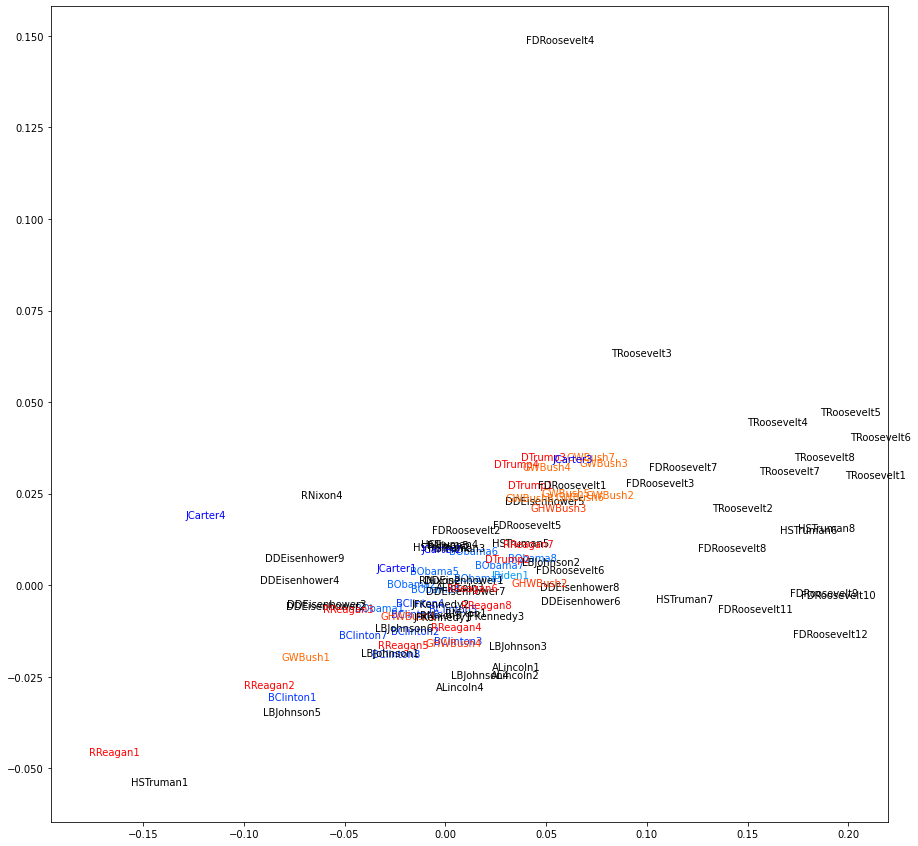

In [26]:
plt.figure(figsize=[15, 15])
for i, speech in enumerate(reduced.columns):
    if speech in cols:
        plt.scatter(pca[i, 4], pca[i, 5], alpha=0)
        pres = re.sub('[0-9]+', '', speech)
        col = colors.get(pres, '#000000')
        plt.annotate(speech, (pca[i, 4], pca[i, 5]), color=col);